# Projet 2 : Analysez des données de systèmes éducatifs #

### Import du nécessaire ###

In [1]:
import numpy as np
import pandas as pd
from annexe import annexe as an
import re
import plotly.graph_objs as go
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)

## 1. Ouverture et affichage grossier du contenu des fichiers du dataset ##

In [37]:

for num_fichier in range(len(an.FICHIERS)):
    print("Fichier numéro ",num_fichier + 1," :")
    data_frame = an.ouvre_csv(num_fichier)
    
    an.print_samples(data_frame,10)
    print("\n\n\n\n\n")

Fichier numéro  1  :

 EdStatsCountry.csv  is open
fichier avec  241  lignes et  31  colonnes.


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
117,LAO,Lao PDR,Lao PDR,Lao People's Democratic Republic,LA,Lao kip,NaN,East Asia & Pacific,Lower middle income,LA,2002,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,Special trade system,Budgetary central government,NaN,2005,"Multiple Indicator Cluster Survey (MICS), 2011/12","Expenditure survey/budget survey (ES/BS), 2008",NaN,2010/11,NaN,NaN,2005
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007
148,MNA,Middle East & North Africa (developing only),Middle East & North Africa,Middle East & North Africa (developing only),XQ,NaN,Middle East and North Africa regional aggregate (does not include high-income economies).,NaN,NaN,XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,LTU,Lithuania,Lithuania,Republic of Lithuania,LT,Lithuanian litas,NaN,Europe & Central Asia,High income: nonOECD,LT,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,1990–95,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2008",Yes,2010,2010.0,2012.0,2007
210,TCA,Turks and Caicos Islands,Turks and Caicos Islands,Turks and Caicos Islands,TC,U.S. dollar,NaN,Latin America & Caribbean,High income: nonOECD,TC,NaN,NaN,NaN,NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,NaN,General trade system,NaN,NaN,2012,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
217,TON,Tonga,Tonga,Kingdom of Tonga,TO,Tongan pa'anga,"Fiscal year ends on June 30; reporting period for national accounts data: FY. April 2013 database update: Based on data from the National Bureau of Statistics, national accounts data were revised; the base year changed to 2010/11.",East Asia & Pacific,Upper middle income,TO,2010/11,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,NaN,General Data Dissemination System (GDDS),2006,NaN,2013 national accounts estimates are based on IMF reports.,NaN,NaN,NaN,2012.0,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does not include high-income economies).,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,GUY,Guyana,Guyana,Co-operative Republic of Guyana,GY,Guyana dollar,"In 2010, the Bureau of Statistics introduced a new series of GDP rebased to year 2006. Current price GDP averaged 63 percent higher than previous estimat







Fichier numéro  2  :

 EdStatsCountry-Series.csv  is open
fichier avec  613  lignes et  3  colonnes.


,CountryCode,SeriesCode,DESCRIPTION
129,CYP,NY.GDP.PCAP.KD,Data are for areas under the effective control of the Government of the Republic of Cyprus.
130,CZE,SP.POP.TOTL,Data sources : Eurostat
146,EGY,SP.POP.TOTL,Data sources : United Nations World Population Prospects
328,MDA,SP.POP.TOTL,"Data sources : National Bureau of Statistics. Excluding Transnistria. For 1950-94, World Bank estimates using UN World Population Prospects' growth rates of whole Moldova."
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.
414,PAN,SP.POP.TOTL,Data sources : United Nations World Population Prospects
293,LBY,NY.GDP.PCAP.PP.KD,Estimates are based on regression.
456,SAU,SP.POP.TOTL,Data sources : United Nations World Population Prospects
572,URY,SP.POP.GROW,Data sources: United Nations World Population Prospects
565,TZA,NY.GNP.PCAP.CD,Covers mainland Tanzania only.








Fichier numéro  3  :

 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
580192,Morocco,MAR,"Enrolment in early childhood education, female (number)",UIS.E.0.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276729.0,284978.0,272226.0,269767.0,265455.000000,NaN,NaN,283008.000000,288762.0,278243.00000,305610.000000,284019.00,NaN,290284.00000,293823.0,326036.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860979,Vanuatu,VUT,Wittgenstein Projection: Mean Years of Schooling. Age 25+. Gender Gap,PRJ.MYS.25UP.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN,NaN,NaN,NaN,0.7600,NaN,NaN,0.65,0.55,0.45,0.37,0.31,0.26,0.22,0.20,0.18,0.17,0.16,0.15,0.15,0.15,0.14,0.14,0.14
456219,Kazakhstan,KAZ,PASEC: Distribution of 2nd grade language scores: 99th Percentile Score,LO.PASEC.REA.2.P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727430,Slovenia,SVN,PASEC: Distribution of 2nd grade mathematics scores: 10th Percentile Score,LO.PASEC.MAT.2.P10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336527,Finland,FIN,TIMSS: Distribution of 8th Grade Science Scores: 5th Percentile Score,LO.TIMSS.SCI8.P05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724236,Slovak Republic,SVK,PISA: Distribution of Mathematics Scores: 10th Percentile Score,LO.PISA.MAT.P10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.501320,NaN,NaN,370.470478,NaN,NaN,376.203458,NaN,NaN,351.63576,NaN,NaN,348.6829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419290,Indonesia,IDN,LLECE: Male 3rd grade students by mathematics proficiency level (%). Level 4,LO.LLECE.MAT3.4.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586001,Mozambique,MOZ,"UIS: Rate of out-of-school adolescents of lower secondary school age, middle quintile, both sexes (household survey data) (%)",UIS.ROFST.H.2.Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.517467,NaN,NaN,NaN,NaN,32.79826,NaN,NaN,38.248909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443417,Italy,ITA,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Total,PRJ.POP.2024.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.72,NaN,NaN,NaN,NaN,47.3300,NaN,NaN,35.78,28.58,23.59,16.42,12.25,9.24,7.04,5.28,3.87,2.75,1.94,1.37,0.96,0.66,0.43,0.27,0.15
180480,Bosn







Fichier numéro  4  :

 EdStatsFootNote.csv  is open
fichier avec  643638  lignes et  4  colonnes.


,CountryCode,SeriesCode,Year,DESCRIPTION
296894,KIR,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s
642793,ZWE,UIS.OE.56.40510,YR2002,UNESCO Institute for Statistics (UIS) estimate
31126,AZE,IT.NET.USER.P2,YR2008,Population age 7+.
183055,EST,SE.ENR.TERT.FM.ZS,YR1996,Country Data
277370,JAM,SE.SEC.ENRL.VO.FE.ZS,YR2002,Country estimation.
306492,KWT,SE.ADT.LITR.ZS,YR1985,Country data
15842,ARE,SE.PRM.REPT.FE.ZS,YR1995,Country Data
560262,SWE,SE.PRM.ENRL,YR2002,Estimated
548804,SSF,UIS.NERT.2.GPI,YR2006,UNESCO Institute for Statistics (UIS) estimate
501966,QAT,SE.PRM.ENRL,YR1998,Country Data








Fichier numéro  5  :

 EdStatsSeries.csv  is open
fichier avec  3665  lignes et  15  colonnes.


,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
1818,PRJ.ATT.4064.3.FE,Attainment,Projection: Percentage of the population age 40-64 by highest level of educational attainment. Upper Secondary. Female,NaN,"Share of the population of the stated age group that has completed upper secondary or incomplete post-secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",NaN,Projections (2010 to 2100),NaN,NaN,NaN,NaN,Wittgenstein Centre for Demography and Global Human Capital: http://www.oeaw.ac.at/vid/dataexplorer/,NaN,NaN,NaN
2883,UIS.EA.5T8.AG25T99.M,Attainment,UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Male,NaN,"The percentage of male population (age 25 and over) with a completed short-cycle tertiary degree (ISCED 5) or higher. This indicator is calculated by dividing the number of males aged 25 years and above who completed a short-cycle tertiary degree by the total male population of the same age group and multiplying the result by 100. The UNESCO Institute for Statistics (UIS) educational attainment dataset shows the educational composition of the population aged 25 years and above and hence the stock and quality of human capital within a country. The dataset also reflects the structure and performance of the education system and its accumulated impact on human capital formation. For more information, visit the UNESCO Institute for Statistics website: http://www.uis.unesco.org/",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
911,LO.EGRA.ORF.TIG.2GRD,Learning Outcomes,EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Tigrinya. 2nd Grade,"Average total number of words correctly read per minute from a narrative or informational reading passage. The oral reading fluency/paragraph reading subtask examines students' ability to read a narrative or informational text with accuracy, with little effort, and at a sufficient rate. Assessors ask students to read the paragraph and stop them after one minute to record the number of words correctly read. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org .","Average total number of words correctly read per minute from a narrative or informational reading passage. The oral reading fluency/paragraph reading subtask examines students' ability to read a narrative or informational text with accuracy, with little effort, and at a sufficient rate. Assessors ask students to read the paragraph and stop them after one minute to record the number of words correctly read. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org .",NaN,NaN,EGRA,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/,NaN,NaN,NaN
1830,PRJ.ATT.60UP.1.FE,Attainment,Projection: Percentage of the population age 60+ by highest level of educational attainment. Primary. Female,NaN,"Share of the population of the stated age group that has completed primary education or incomplete lower secondary

#### Rapide analyse des 5 fichiers
**1. EdstatCountry.csv**  
On peut voir qu'il y a dans le premier fichier **31 colonnes de 241 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Country Code,Short Name,Table Name,Long Name,2-alpha code,WB-2 code
 - des categories : Lending category, Currency Unit, Income Group, Government Accounting concept, IMF data dissemination standard
 - des données géographiques : Region
 - des rescencements : National accounts base year, National accounts reference year, SNA price valuation, PPP survey year, Latest population census, Latest household survey, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data
 - d'autres données : Special Notes, Other groups,System of National Accounts,Alternative conversion factor,Balance of Payments Manual in use,External debt Reporting status, System of trade, Source of most recent Income and expenditure data, Vital registration complete 

Ce fichier semble être une source de données générals sur chaque pays.
 
 
**2. EdStatsCountry-Series.csv**  
On peut voir qu'il y a dans le deuxième fichier **3 colonnes de 613 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : CountryCode, SeriesCode.
 - une description : DESCRIPTION.

Ce fichier donne la source des données pour une série à un pays donné.


**3. EdStatsData.csv**  
On peut voir qu'il y a dans le troisième fichier EdStatsData.csv **69 colonnes de 886930 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Country Name, Country Code, Indicator Name, Indicator Code.
 - des années : de 1970 à 2017, puis de 2020 à 2100 par pas de 5 ans.

Ce fichier donne les nombres pour chaque année de chaque série.


**4. EdStatsFootNote.csv**  
On peut voir qu'il y a dans le quatrième fichier **4 colonnes de 643638 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : CountryCode, SeriesCode.
 - une donnée temporelle : Year.
 - une description : DESCRIPTION.

Ce fichier donne la provenance des données quantitative pour une série, un pays à une année donné.


**5. EdStatsSeries.csv**
On peut voir qu'il y a dans le cinquième et dernier fichier **15 colonnes de 3665 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Series Code.
 - des descriptions : Indicator Name, Topic, Short definition, Long definition.
 - des données temporelles : Periodicity, Base Period.
 - d'autres données : Other notes, Aggregation method, Limitations and exceptions, General comments, Source, Statistical concept and methodology, Development relevance, Related source links.

Ce fichier semble être une source de données descriptives de chaque série .


Après avoir regardé tout les fichiers il ne me parait pas utile de continuer l'exploration dans les fichiers EdStatsCountry-Series.csv et EdStatsFootNote.csv. Le fichier EdstatCountry.csv me parait utile pour la colonne 'Income group' de chaque pays, je vais donc le garder pour plus tard.
Je vais donc continuer avec les fichiers EdStatsData.csv pour les données chiffrées. Il me semble que EdStatsSeries.csv contient des explications sur les lignes de EdStatsData.csv, si besoin j'utiliserais donc EdStatsSeries.csv pour mieux comprendre EdStatsData.csv.

Je vois dans EdStatsData.csv que l'on parle d'éducation, de primaire, secondaire, peut-être tertiaire. On parle aussi d'années moyennes de scolarité.

## 2. Recherche de ligne contenant des mots clé

Je vais essayer de faire ressortir tout les différents type de lignes (colonne:'Indicator Name') du fichier EdStatsData.csv contenant : school, student, secondary, tertiary, educational, inhabitant, household, technology, computer, Internet et population. 

In [2]:
fichierESD = an.ouvre_csv(2)
print(type(fichierESD))
index = fichierESD['Indicator Name'].squeeze()
print(index)
print(type(index))


 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.
<class 'pandas.core.frame.DataFrame'>
0                    Adjusted net enrolment rate, lower secondary, both sexes (%)
1                        Adjusted net enrolment rate, lower secondary, female (%)
2         Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
3                          Adjusted net enrolment rate, lower secondary, male (%)
4                            Adjusted net enrolment rate, primary, both sexes (%)
                                           ...                                   
886925                    Youth illiterate population, 15-24 years, male (number)
886926                Youth literacy rate, population 15-24 years, both sexes (%)
886927                    Youth literacy rate, population 15-24 years, female (%)
886928     Youth literacy rate, population 15-24 years, gender parity index (GPI)
886929                      Youth literacy rate, population 15-24 ye

In [4]:
index_secondary = index.str.contains('secondary',case=False, regex = True, na = False)

In [13]:
fichierESD = an.ouvre_csv(2)
index = fichierESD['Indicator Name'].squeeze()
index_secondary = index.str.contains('secondary',case=False, regex = True, na = False)
index_tertiary = index.str.contains('tertiary',case=False, regex = True, na = False)
index_school_educational = index.str.contains('school|ducationnal',case=False, regex = True, na = False)
index_student = index.str.contains('student',case=False, regex = True, na = False)
index_inhabitant_household= index.str.contains('inhabitant|household',case=False, regex = True, na = False)
index_tech_computer_internet= index.str.contains('technology|computer|internet',case=False, regex = True, na = False)
index_population= index.str.contains('population',case=False, regex = True, na = False)
print("Pour secondary ",len(fichierESD[index_secondary]['Indicator Name'].unique())," lignes de trouvé")
print("Pour tertiary ",len(fichierESD[index_tertiary]['Indicator Name'].unique())," lignes de trouvé")
print("Pour school et educational ",len(fichierESD[index_school_educational]['Indicator Name'].unique())," lignes de trouvé")
print("Pour student ",len(fichierESD[index_student]['Indicator Name'].unique())," lignes de trouvé")
print("Pour inhabitant et household ",len(fichierESD[index_inhabitant_household]['Indicator Name'].unique())," lignes de trouvé")
print("Pour computer et internet ",len(fichierESD[index_tech_computer_internet]['Indicator Name'].unique())," lignes de trouvé")
print("Pour population ",len(fichierESD[index_population]['Indicator Name'].unique())," lignes de trouvé")


 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.
Pour secondary  847  lignes de trouvé
Pour tertiary  330  lignes de trouvé
Pour school et educational  675  lignes de trouvé
Pour student  703  lignes de trouvé
Pour inhabitant et household  52  lignes de trouvé
Pour computer et internet  34  lignes de trouvé
Pour population  838  lignes de trouvé


### 2.1 Regard des résultats

Je vais regarder pour chaque mot clé les lignes obtenues et prendre celles qui nous interessent sans trop faire de tri. Je ne mettrais pas deux fois les lignes qui intersecte deux catégories.

In [7]:
print(fichierESD[index_secondary]['Indicator Name'].unique())

['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 'Adjusted net enrolment rate, lower secondary, male (%)'
 'Adjusted net enrolment rate, upper secondary, both sexes (%)'
 'Adjusted net enrolment rate, upper secondary, female (%)'
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)'
 'Adjusted net enrolment rate, upper secondary, male (%)'
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)'
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, female (number)'
 'Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, both sexes (number)'
 'Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, female (numbe

Les catégories intéressantes sont :  
-Adjusted net enrolment rate, upper secondary, both sexes (%)  
-Barro-Lee: Average years of secondary schooling, age 15+, total  
-Barro-Lee: Average years of secondary schooling, age 25+, total  
-Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary  
-Current expenditure as % of total expenditure in secondary public institutions (%)  
-Enrolment in Grade 6 of lower secondary general education, both sexes (number)  
-Enrolment in post-secondary non-tertiary education, both sexes (number)  
-Enrolment in secondary education, both sexes (number)  
-Gross enrolment ratio, upper secondary, both sexes (%)  
-School life expectancy, secondary, both sexes (years)  

In [8]:
print(fichierESD[index_tertiary]['Indicator Name'].unique())

['All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)'
 'All staff compensation as % of total expenditure in tertiary public institutions (%)'
 'Barro-Lee: Average years of tertiary schooling, age 15+, female'
 'Barro-Lee: Average years of tertiary schooling, age 15+, total'
 'Barro-Lee: Average years of tertiary schooling, age 15-19, female'
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total'
 'Barro-Lee: Average years of tertiary schooling, age 20-24, female'
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total'
 'Barro-Lee: Average years of tertiary schooling, age 25+, female'
 'Barro-Lee: Average years of tertiary schooling, age 25+, total'
 'Barro-Lee: Average years of tertiary schooling, age 25-29, female'
 'Barro-Lee: Average years of tertiary schooling, age 25-29, total'
 'Barro-Lee: Average years of tertiary schooling, age 30-34, female'
 'Barro-Lee: Average years of tertiary schooling, age 30-34

Les catégories intéressantes sont :  
-Adjusted net enrolment rate, upper secondary, both sexes (%)  
-Barro-Lee: Average years of tertiary schooling, age 25+, total  
-Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary  
-Current expenditure as % of total expenditure in tertiary public institutions (%)  
-Enrolment in tertiary education per 100,000 inhabitants, both sexes  
-Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)  
-Graduates from tertiary education, both sexes (number)  
-UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total  
-Gross enrolment ratio, tertiary, both sexes (%)  
-School life expectancy, tertiary, both sexes (years)  

In [9]:
print(fichierESD[index_school_educational]['Indicator Name'].unique())

['Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)'
 'Africa Dataset: Average size of classes in primary schools (number of pupils)'
 'Africa Dataset: Average size of multigrade classes in primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 1 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 2 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 3 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 4 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 5 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 6 of primary schools (number of pupils)'
 'Africa Dataset: Average size of single grade classes in Grade 7 of primary schools (number o

Les catégories intéressantes sont :  
-UIS: Percentage of population age 25+ with no schooling. Total  
-Wittgenstein Projection: Mean years of schooling. Age 25+. Total  
-UIS: Mean years of schooling of the population age 25+. Total  
-Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total  
-Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total  
-Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total  

In [10]:
print(fichierESD[index_student]['Indicator Name'].unique())

['EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Bamanankan. 2nd Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Bomu. 2nd Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Chichewa. 2nd Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Chichewa. 4th Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 2nd Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 3rd Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 4th Grade'
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 6th Grade'
 'EGRA

Il n'y a aucune nouvelle cellule interessante dans ce jeu de données.

In [11]:
print(fichierESD[index_inhabitant_household]['Indicator Name'].unique())

['Enrolment in tertiary education per 100,000 inhabitants, both sexes'
 'Enrolment in tertiary education per 100,000 inhabitants, female'
 'Enrolment in tertiary education per 100,000 inhabitants, male'
 'SABER: (School Finance) Policy Goal 2 Lever 2: Do payments for schooling represent a high share of income for low income households?'
 'UIS: Rate of out-of-school adolescents of lower secondary school age, both sexes (household survey data) (%)'
 'UIS: Rate of out-of-school adolescents of lower secondary school age, female (household survey data) (%)'
 'UIS: Rate of out-of-school adolescents of lower secondary school age, fourth quintile, both sexes (household survey data) (%)'
 'UIS: Rate of out-of-school adolescents of lower secondary school age, fourth quintile, female (household survey data) (%)'
 'UIS: Rate of out-of-school adolescents of lower secondary school age, fourth quintile, male (household survey data) (%)'
 'UIS: Rate of out-of-school adolescents of lower secondary scho

Il n'y a aucune nouvelle cellule interessante dans ce jeu de données.

In [14]:
print(fichierESD[index_population]['Indicator Name'].unique())

['Adult illiterate population, 15+ years, % female'
 'Adult illiterate population, 15+ years, both sexes (number)'
 'Adult illiterate population, 15+ years, female (number)'
 'Adult illiterate population, 15+ years, male (number)'
 'Adult literacy rate, population 15+ years, both sexes (%)'
 'Adult literacy rate, population 15+ years, female (%)'
 'Adult literacy rate, population 15+ years, gender parity index (GPI)'
 'Adult literacy rate, population 15+ years, male (%)'
 'Barro-Lee: Percentage of female population age 15+ with no education'
 'Barro-Lee: Percentage of female population age 15+ with primary schooling. Completed Primary'
 'Barro-Lee: Percentage of female population age 15+ with primary schooling. Total (Incomplete and Completed Primary)'
 'Barro-Lee: Percentage of female population age 15+ with secondary schooling. Completed Secondary'
 'Barro-Lee: Percentage of female population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)'
 'Barro-Lee: P

Les catégories intéressantes sont :  
-UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total  
-UIS: Percentage of population age 25+ with a completed bachelor's or equivalent degree (ISCED 6). Total  
-UIS: Percentage of population age 25+ with a completed master's or equivalent degree (ISCED 7). Total  
-UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Total  
-UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total  
-UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Total  
-UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total  
-UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total  


In [15]:
print(fichierESD[index_tech_computer_internet]['Indicator Name'].unique())

['Internet users (per 100 people)'
 'Percentage of graduates from non-science and non-technology fields in tertiary education who are female (%)'
 'Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)'
 'Personal computers (per 100 people)'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Below Level 1'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Failed the ICT Core Test'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 2'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 3'
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience'
 'PIAAC: Adults by proficiency level in problem solving in

Les catégories intéressantes sont :  
-Internet users (per 100 people)  
-Personal computers (per 100 people)

### 2.2 Tri des données intéressentes

Je vais faire un second tri pour déterminer une stratégie avec les catégories ressorties au point d'avant.  
Plusieurs catégories peuvent être créé en sommant les données entre elles.  
  
Nombres de personnes entrant en études dans les catégories qui nous interessent:  
-Enrolment in Grade 6 of lower secondary general education, both sexes (number)  
-Enrolment in post-secondary non-tertiary education, both sexes (number)  
-Enrolment in secondary education, both sexes (number)  
-Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 8 programmes, both sexes (number) 
  
Nombre d'années d'études moyenne par personne agé de plus de 25 ans:  
-Barro-Lee: Average years of secondary schooling, age 25+, total  
-Barro-Lee: Average years of tertiary schooling, age 25+, total  
  
-UIS: Mean years of schooling of the population age 25+. Total 
  
Nombre d'années d'études que voudrait faire les étudiants:  
-School life expectancy, secondary, both sexes (years)  
-School life expectancy, tertiary, both sexes (years) 
  
  
<!-- Nombre d'étudiants ayant fini des études de troisième cycle:   
-Graduates from tertiary education, both sexes (number)   -->

Prévision en millier du nombre d'étudiants:  
-Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total  



Nombre d'utilisateur d'internet pour 100 personnes:  
-Internet users (per 100 people)  

Nombre d'ordinateurs personnel pour 100 personnes:  
-Personal computers (per 100 people)  

Les catégories enlevé étaient soient redondante dans l'information qu'elles apportaient soit ne donnaient que des fragments que ce que d'autre catégories apportent.

## 3.Préparation des dataframes

### 3.1 Enlever les colonnes inintéressantes 

Je veux garder dans le fichier **EdStatsCountry** 'Country Code','Short Name' et 'Income Group'.  
Pour le fichier **EdStatsData** je veux garder les colonnes 'Country Name','Country Code','Indicator Name' et les colonnes des années entre 2001 et 2031.

In [16]:
ESC_column_to_keep = ['Country Code','Short Name','Income Group']
ESD_column_to_keep = ['Country Name','Country Code','Indicator Name'] + list(map(str,[*range(2001,2018,1)])) + list(map(str,[*range(2020,2031,5)]))

fichierESC = an.to_keep(0,ESC_column_to_keep)
fichierESD = an.to_keep(2,ESD_column_to_keep)


 EdStatsCountry.csv  is open
fichier avec  241  lignes et  31  colonnes.
nouveau format du fichier :  241  lignes et  3  colonnes.

 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.
nouveau format du fichier :  886930  lignes et  23  colonnes.


### 3.2 Enlever les lignes vides

Je vais enlever toutes les lignes avec aucune données numérique.

In [18]:
fichierESC2 = fichierESC.dropna(axis = 'index',thresh = 3)
fichierESD2 = fichierESD.dropna(axis = 'index',thresh = 4)
print("le fichier avait 241 lignes, il a maintenant ",fichierESC2.shape[0]," lignes")
print("le fichier avait 886930 lignes, il a maintenant ",fichierESD2.shape[0]," lignes")

le fichier avait 241 lignes, il a maintenant  214  lignes
le fichier avait 886930 lignes, il a maintenant  347465  lignes


Les deux fichiers ont été allégé de beaucoup de lignes par rapport à leur taille respectives.

### 3.3 Création des catégories intéressantes

Je regroupe dans des listes les catégories intéressantes du point 2.2.

In [19]:
new_students = ['Enrolment in Grade 6 of lower secondary general education, both sexes (number)','Enrolment in post-secondary non-tertiary education, both sexes (number)','Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)']
study_years_more_25 = ['Barro-Lee: Average years of secondary schooling, age 25+, total','Barro-Lee: Average years of tertiary schooling, age 25+, total']
study_years_mean_25 = ['UIS: Mean years of schooling of the population age 25+. Total']
study_years_expected = ['School life expectancy, secondary, both sexes (years)','School life expectancy, tertiary, both sexes (years)']
new_students_prediction = ['Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total','Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total']
internet_users = ['Internet users (per 100 people)']
computer_owner = ['Personal computers (per 100 people)']
category = [new_students,study_years_more_25,study_years_mean_25,study_years_expected,new_students_prediction,internet_users,computer_owner]

Je fais ressortir dans des variables les catégories voulues.

In [67]:
dataframe_new_students = an.take_needed_rows(fichierESD2,new_students)
dataframe_study_years_more_25= an.take_needed_rows(fichierESD2,study_years_more_25)
dataframe_study_years_mean_25= an.take_needed_rows(fichierESD2,study_years_mean_25)
dataframe_study_years_expected= an.take_needed_rows(fichierESD2,study_years_expected)
dataframe_new_students_prediction= an.take_needed_rows(fichierESD2,new_students_prediction)
dataframe_internet_users= an.take_needed_rows(fichierESD2,internet_users)
dataframe_computer_owner= an.take_needed_rows(fichierESD2,computer_owner)

J'additione maintenant les valeurs par pays.

In [68]:
dataframe_new_students_sum = dataframe_new_students.groupby(['Country Code']).sum()
dataframe_study_years_more_25_sum= dataframe_study_years_more_25.groupby(['Country Code']).sum()
dataframe_study_years_mean_25_sum= dataframe_study_years_mean_25.groupby(['Country Code']).sum()
dataframe_study_years_expected_sum= dataframe_study_years_expected.groupby(['Country Code']).sum()
dataframe_new_students_prediction_sum= dataframe_new_students_prediction.groupby(['Country Code']).sum()
dataframe_internet_users_sum= dataframe_internet_users.groupby(['Country Code']).sum()
dataframe_computer_owner_sum= dataframe_computer_owner.groupby(['Country Code']).sum()

## 4. Affichage des données obtenues

### 4.1 Affichage des groupes de revenu

Je vais modifier le fichier edStatCountry.csv pour l'affichage puis vous montrer la répartition des pays par groupes de revenu.

In [40]:
fichierESC3 = an.replace_ESC(fichierESC2,0)
fichierESC3b = an.replace_ESC(fichierESC2,1)

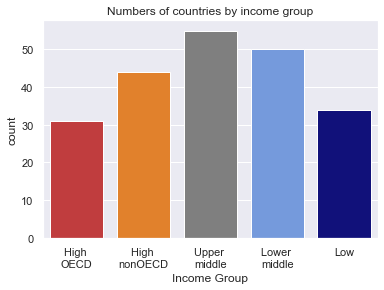

In [41]:
an.sns_graph(fichierESC3)

In [52]:
countries = fichierESC3b['Country Code'].tolist()
z = fichierESC3b['Income Group'].tolist()
layout = dict(geo={'scope': 'world'})
# colorscalec customize
scl = [[0.0, 'darkblue'],[0.2, 'cornflowerblue'],[0.4, 'cornflowerblue'],\
           [0.6, 'orange'],[0.8, 'orange'],[1.0, 'red']]
data = dict(
    type='choropleth',
    locations=countries,
    locationmode='ISO-3',
    colorscale=scl,
    autocolorscale = False,
    marker = dict(line = dict (color = 'rgb(0,0,0)', width = 0)),
    z=z)
map = go.Figure(data=[data], layout=layout)
# py.plot(map)
map.show()

Nous avons beaucoup de pays dans les hauts revenus. Le choix du pays où investir ce fera à l'aide d'un autre paramètre.

### 4.2 Affichage des ordinateurs personnelle et de l'utilisation d'internet

In [78]:
dataframe_internet_users_sum2 = dataframe_internet_users_sum.replace(0,np.nan)
dataframe_internet_users_sum3 = dataframe_internet_users_sum2.dropna(axis = 'columns', how = 'all')
display(dataframe_internet_users_sum3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,
ABW,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.000000,58.000000,62.000000,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454
AFG,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
AGO,0.136014,0.270377,0.370682,0.464815,1.143367,1.500000,1.700000,1.900000,2.300000,2.800000,3.100000,6.500000,8.900000,10.200000,12.400000,13.000000
ALB,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.860000,41.200000,45.000000,49.000000,54.655959,57.200000,60.100000,63.252933,66.363445
AND,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.530000,81.000000,81.000000,86.434425,94.000000,95.900000,96.910000,97.930637
ARB,1.561288,2.693061,3.645881,7.006812,8.393142,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN,NaN
ARE,26.271754,28.316485,29.477953,30.131296,40.000000,52.000000,61.000000,63.000000,64.000000,68.000000,78.000000,84.999991,88.000000,90.400000,90.500000,90.600007
ARG,9.780807,10.882124,11.913697,16.036684,17.720583,20.927202,25.946633,28.112623,34.000000,45.000000,51.000000,55.800000,59.900000,64.700000,68.043064,70.150764
ARM,1.631095,1.960405,4.575217,4.899009,5.252983,5.631788,6.021253,6.210000,15.300000,25.000000,32.000000,37.500000,41.900000,54.622806,59.102378,62.000000


In [79]:
countries = dataframe_internet_users_sum3.index.tolist()
z = dataframe_internet_users_sum3["2016"].tolist()
layout = dict(geo={'scope': 'world'})
# colorscalec customize
scl = [[0.0, 'darkblue'],[0.2, 'cornflowerblue'],[0.4, 'cornflowerblue'],\
           [0.6, 'orange'],[0.8, 'orange'],[1.0, 'red']]
data = dict(
    type='choropleth',
    locations=countries,
    locationmode='ISO-3',
    colorscale=scl,
    autocolorscale = False,
    marker = dict(line = dict (color = 'rgb(0,0,0)', width = 0)),
    z=z)
map = go.Figure(data=[data], layout=layout)
# py.plot(map)
map.show()

In [69]:
dataframe_computer_owner_sum2 = dataframe_computer_owner_sum.replace(0,np.nan)
dataframe_computer_owner_sum3 = dataframe_computer_owner_sum2.dropna(axis = 'columns', how = 'all')
display(dataframe_computer_owner_sum3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009
Country Code,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,7.923544,9.917683,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN
AGO,0.118176,0.181371,NaN,NaN,0.564518,0.646019,NaN,NaN,NaN
ALB,0.912941,1.103078,1.296542,1.492446,1.689543,3.774092,4.105840,4.593538,NaN
ARB,2.414015,2.517600,3.401317,3.979838,5.305007,6.676681,NaN,NaN,NaN
ARE,13.409516,13.957951,19.292104,23.232562,25.308017,28.714185,NaN,NaN,NaN
ARG,7.780356,7.972883,8.164252,8.353177,9.056130,NaN,NaN,NaN,NaN
ARM,1.143806,1.969149,3.392586,6.610146,9.851017,NaN,NaN,NaN,NaN
ATG,10.130173,11.245783,12.360328,13.460927,14.655120,20.966370,NaN,NaN,NaN


In [76]:
countries = dataframe_computer_owner_sum3.index.tolist()
z = dataframe_computer_owner_sum3["2005"].tolist()
layout = dict(geo={'scope': 'world'})
# colorscalec customize
scl = [[0.0, 'darkblue'],[0.2, 'cornflowerblue'],[0.4, 'cornflowerblue'],\
           [0.6, 'orange'],[0.8, 'orange'],[1.0, 'red']]
data = dict(
    type='choropleth',
    locations=countries,
    locationmode='ISO-3',
    colorscale=scl,
    autocolorscale = False,
    marker = dict(line = dict (color = 'rgb(0,0,0)', width = 0)),
    z=z)
map = go.Figure(data=[data], layout=layout)
# py.plot(map)
map.show()